# 데이터 새로 조정
# 0517 시작

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('metaverse_data.xlsx')
data

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Lee, CW",NaN,NaN,NaN,"Lee, Chang Won",NaN,NaN,Application of Metaverse Service to Healthcare...,INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARC...,...,NaN,NaN,NaN,36293609.0,NaN,NaN,NaN,NaN,WOS:000873101900001,View Full Record in Web of Science
1,C,"Nguyen, CT; Hoang, DT; Nguyen, DN; Dutkiewicz, E",NaN,NaN,IEEE,"Nguyen, Cong T.; Hoang, Dinh Thai; Nguyen, Die...",NaN,NaN,MetaChain: A Novel Blockchain-based Framework ...,2022 IEEE 95TH VEHICULAR TECHNOLOGY CONFERENCE...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000861825803029,View Full Record in Web of Science
2,J,"Dahan, NA; Al-Razgan, M; Al-Laith, A; Alsoufi,...",NaN,NaN,NaN,"Dahan, Neama A.; Al-Razgan, Muna; Al-Laith, Al...",NaN,NaN,Metaverse Framework: A Case Study on E-Learnin...,ELECTRONICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000802478800001,View Full Record in Web of Science
3,J,"Gupta, A; Khan, HU; Nazir, S; Shafiq, M; Shaba...",NaN,NaN,NaN,"Gupta, Ankur; Khan, Habib Ullah; Nazir, Shah; ...",NaN,NaN,"Metaverse Security: Issues, Challenges and a V...",ELECTRONICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000914540900001,View Full Record in Web of Science
4,C,"Mozumder, MAI; Sheeraz, MM; Athar, A; Aich, S;...",NaN,NaN,IEEE,"Mozumder, Md Ariful Islam; Sheeraz, Muhammad M...",NaN,NaN,Overview: Technology Roadmap of the Future Tre...,2022 24TH INTERNATIONAL CONFERENCE ON ADVANCED...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000835722000093,View Full Record in Web of Science
5,C,"Chen, BH; Song, CX; Lin, BY; Xu, X; Tang, RY; ...",NaN,NaN,IEEE,"Chen, Bohan; Song, Chengxin; Lin, Boyu; Xu, Xi...",NaN,NaN,A Cross-platform Metaverse Data Management System,2022 IEEE INTERNATIONAL CONFERENCE ON METROLOG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000947347200026,View Full Record in Web of Science
6,J,"Seo, S; Seok, B; Lee, C",NaN,NaN,NaN,"Seo, Seunghee; Seok, Byoungjin; Lee, Changhoon",NaN,NaN,Digital forensic investigation framework for t...,JOURNAL OF SUPERCOMPUTING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000916905100005,View Full Record in Web of Science
7,C,"Inceoglu, MM; Ciloglugil, B",NaN,"Gervasi, O; Murgante, B; Misra, S; Rocha, AMAC...",NaN,"Inceoglu, Mustafa Murat; Ciloglugil, Birol",NaN,NaN,Use of Metaverse in Education,"COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000916462800012,View Full Record in Web of Science
8,C,"Njoku, JN; Nwakanma, CI; Kim, DS",NaN,NaN,IEEE,"Njoku, Judith Nkechinyere; Nwakanma, Cosmas If...",NaN,NaN,The Role of 5G Wireless Communication System i...,2022 27TH ASIA PACIFIC CONFERENCE ON COMMUNICA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000918854200060,View Full Record in Web of Science
9,C,"Zhang, LJ",NaN,"Tekinerdogan, B; Wang, Y; Zhang, LJ",NaN,"Zhang, Liang-Jie",NaN,NaN,MRA: Metaverse Reference Architecture,INTERNET OF THINGS - ICIOT 2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000772174700008,View Full Record in Web of Science


# 1. LDA 모델 구축 후 토픽 출력

In [3]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords

# 엑셀 파일에서 데이터 읽어오기
df = pd.read_excel('metaverse_data.xlsx')
texts = df['Abstract'].dropna().tolist()

# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 각 문서를 단어 리스트로 변환
texts = [[word for word in str(text).split()] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10)

# 결과 출력
for topic in lda_model.print_topics():
    print(topic)

(0, '0.041*"\'metaverse\'," + 0.009*"\'virtual\'," + 0.008*"\'development\'," + 0.007*"\'technology\'," + 0.007*"\'field\'," + 0.006*"\'based\'," + 0.006*"\'metaverse,\'," + 0.005*"\'paper\'," + 0.005*"\'metaverse.\'," + 0.005*"\'research\',"')
(1, '0.016*"\'metaverse\'," + 0.006*"\'readiness\'," + 0.005*"\'virtual\'," + 0.004*"\'stock\'," + 0.003*"\'metaverse,\'," + 0.003*"\'authors\'," + 0.003*"\'digital\'," + 0.003*"\'different\'," + 0.003*"\'however,\'," + 0.003*"\'study\',"')
(2, '0.040*"\'metaverse\'," + 0.013*"\'virtual\'," + 0.008*"\'digital\'," + 0.007*"\'development\'," + 0.007*"\'metaverse,\'," + 0.006*"\'discuss\'," + 0.006*"\'world\'," + 0.006*"\'technologies\'," + 0.005*"\'paper\'," + 0.005*"\'5g\',"')
(3, '0.048*"\'metaverse\'," + 0.011*"\'virtual\'," + 0.006*"\'challenges\'," + 0.005*"\'digital\'," + 0.005*"\'metaverse,\'," + 0.005*"\'office\'," + 0.005*"\'metaverse.\'," + 0.005*"\'healthcare\'," + 0.004*"\'development\'," + 0.004*"\'study\',"')
(4, '0.023*"\'metaverse\

# 2. 토픽별 단어 빈도 그래프 시각화

C:\Users\jwoo\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\jwoo\anaconda3\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\jwoo\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\jwoo\anaconda3\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\jwoo\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Loos

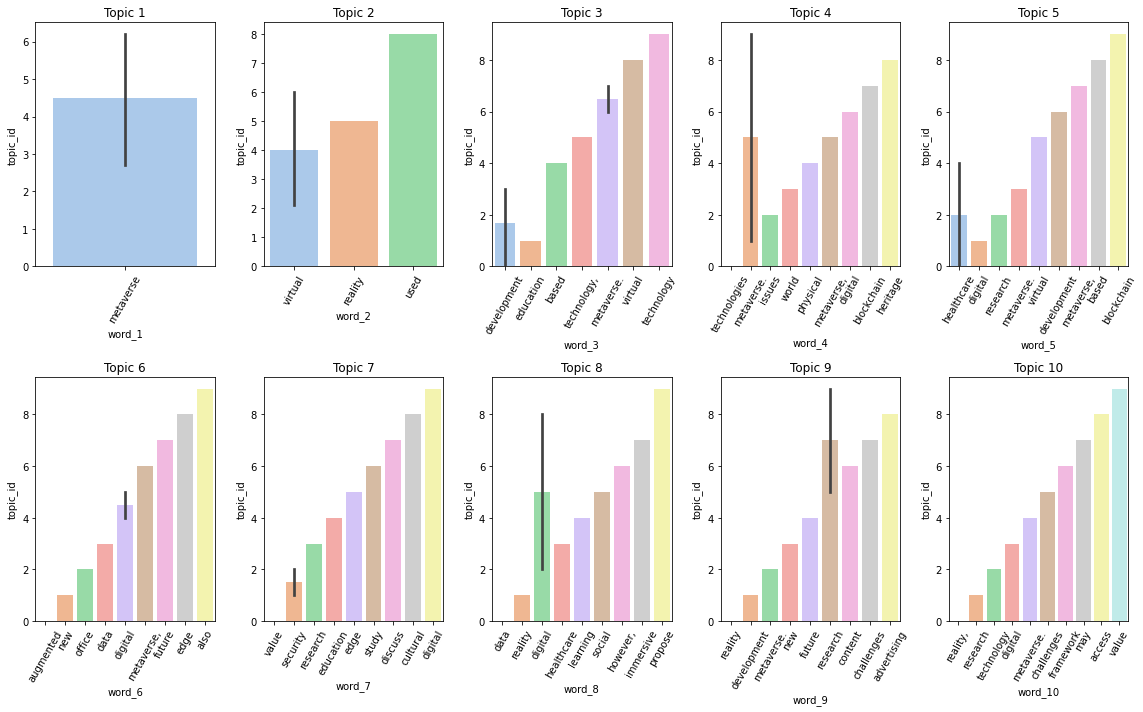

In [4]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import defaultdict
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# 엑셀 파일에서 데이터 읽어오기
df = pd.read_excel('meta_data.xlsx')
texts = df['Abstract'].dropna().tolist() # 14행에 결측치 있어서 제거 후 리스트 변환

# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10)

# 토픽 별 상위 단어 추출
topic_word = []
for i, topic in lda_model.show_topics(formatted = False, num_words = 10):
    topic_word.append([i] + [word[0] for word in topic])
    
# 데이터프레임으로 변환
topic_word_df = pd.DataFrame(topic_word, columns=['topic_id', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5', 'word_6', 'word_7', 'word_8', 'word_9', 'word_10'])


# 1) 토픽별 단어 빈도 그래프 생성
plt.figure(figsize = (16,10))
for i in range(1, lda_model.num_topics + 1):
    plt.subplot(2, 5, i)
    sns.barplot(x = 'word_' + str(i), y = 'topic_id', data = topic_word_df, palette = 'pastel')
    plt.title('Topic ' + str(i))
    plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

# 3. 토픽별 단어 빈도 표 시각화

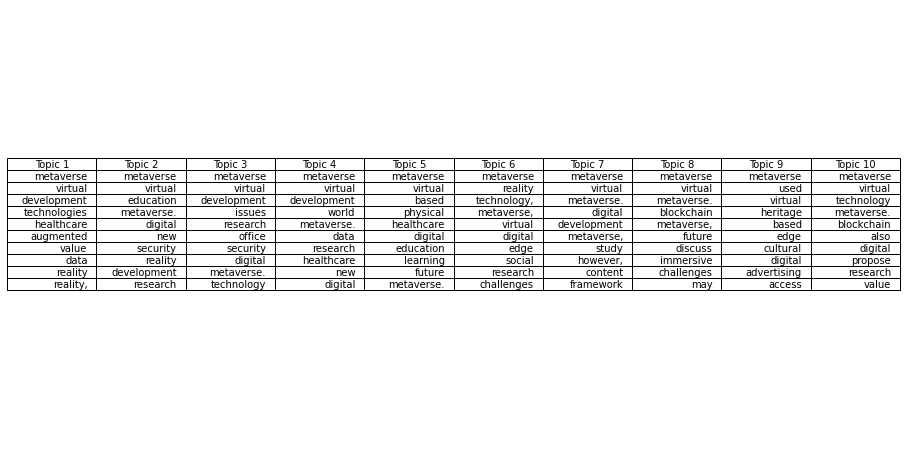

In [5]:
# 2) 토픽별 단어 빈도 표 생성

# Get the top 10 words for each topic
topics = lda_model.show_topics(num_topics = 10, num_words = 10, formatted = False)

# Create a dataframe to store the top words for each topic
df = pd.DataFrame()

# Iterate over the topics and add the top words to the dataframe
for topic in topics:
    topic_num = topic[0]
    words = [word[0] for word in topic[1]]
    df['Topic {}'.format(topic_num + 1)] = words

# Create a table using matplotlib
fig, ax = plt.subplots(figsize = (16,8))
ax.axis('off')
ax.table(cellText = df.values, colLabels = df.columns, loc = 'center')
plt.show()

# 4. 

In [6]:
# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10)

# 각 토픽에서 가장 많이 등장한 상위 3개의 단어 추출
top_n = 3
topic_words = {}
for i in range(lda_model.num_topics):
    topic_words[i] = [word for word, _ in lda_model.show_topic(i, topn = top_n)]

# 주요 토픽 추출
major_topic = {}
for i, text in enumerate(texts):
    topic_scores = sorted(lda_model[corpus[i]], key = lambda x: -x[1])
    major_topic[i] = topic_scores[0][0]  # 가장 높은 점수를 받은 토픽 번호
    
for topic, words in topic_words.items():
    count = 0
    for i, t in major_topic.items():
        if t == topic and set(words) & set(texts[i]):
            count += 1
    print(f"Topic {topic + 1}: {count}")


Topic 1: 13
Topic 2: 2
Topic 3: 7
Topic 4: 4
Topic 5: 3
Topic 6: 9
Topic 7: 2
Topic 8: 6
Topic 9: 1
Topic 10: 3


# 5. 문서의 토픽 비율

In [7]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# 데이터 불러오기
df = pd.read_excel('metaverse_data.xlsx')
texts = df['Abstract'].dropna().tolist()

# 텍스트 전처리
# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 문서-단어 행렬(corpus) 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 각 문서가 어떤 토픽에 속하는지 확인
for i, topic_list in enumerate(lda_model[corpus]):
    print(f"문서 {i}의 토픽 비율:", topic_list)


문서 0의 토픽 비율: [(1, 0.9909988)]
문서 1의 토픽 비율: [(4, 0.99188995)]
문서 2의 토픽 비율: [(2, 0.9910876)]
문서 3의 토픽 비율: [(4, 0.98593426)]
문서 4의 토픽 비율: [(8, 0.9884587)]
문서 5의 토픽 비율: [(8, 0.98524296)]
문서 6의 토픽 비율: [(5, 0.99399906)]
문서 7의 토픽 비율: [(3, 0.98999864)]
문서 8의 토픽 비율: [(4, 0.9812453)]
문서 9의 토픽 비율: [(8, 0.98749745)]
문서 10의 토픽 비율: [(2, 0.9916654)]
문서 11의 토픽 비율: [(7, 0.9921727)]
문서 12의 토픽 비율: [(0, 0.98571205)]
문서 13의 토픽 비율: [(7, 0.88565695), (8, 0.10804254)]
문서 14의 토픽 비율: [(4, 0.23478994), (7, 0.75928265)]
문서 15의 토픽 비율: [(4, 0.9957737)]
문서 16의 토픽 비율: [(1, 0.98043084)]
문서 17의 토픽 비율: [(8, 0.9930219)]
문서 18의 토픽 비율: [(4, 0.9921719)]
문서 19의 토픽 비율: [(6, 0.99099845)]
문서 20의 토픽 비율: [(8, 0.98988545)]
문서 21의 토픽 비율: [(6, 0.96896064)]
문서 22의 토픽 비율: [(4, 0.9924979)]
문서 23의 토픽 비율: [(4, 0.9876685)]
문서 24의 토픽 비율: [(8, 0.96785104)]
문서 25의 토픽 비율: [(1, 0.99090767)]
문서 26의 토픽 비율: [(5, 0.99062383)]
문서 27의 토픽 비율: [(4, 0.96399105)]
문서 28의 토픽 비율: [(6, 0.98420787)]
문서 29의 토픽 비율: [(4, 0.9924352)]
문서 30의 토픽 비율: [(4, 0.9639884